In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

In [6]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25000,)
X_test shape: (25000,)
y_train shape: (25000,)
y_test shape: (25000,)


In [7]:
print("Review is", X_train[0])

Review is [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
print("Review label is", y_train[0])

Review label is 1


In [9]:
vocab = imdb.get_word_index()
print(list(vocab.items())[:10])
print("y_train distribution:", np.bincount(y_train))
print("y_test distribution:", np.bincount(y_test))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008)]
y_train distribution: [12500 12500]
y_test distribution: [12500 12500]


In [10]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [11]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9998


In [12]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


In [13]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join([reverse_index.get(i - 3, "#") for i in data[0]])
print("Decoded review sample:", decoded[:100] + "...")

Decoded review sample: # this film was just brilliant casting location scenery story direction everyone's really suited the...


In [14]:
data_vectorized = vectorize(data)
label = np.array(label).astype("float32")

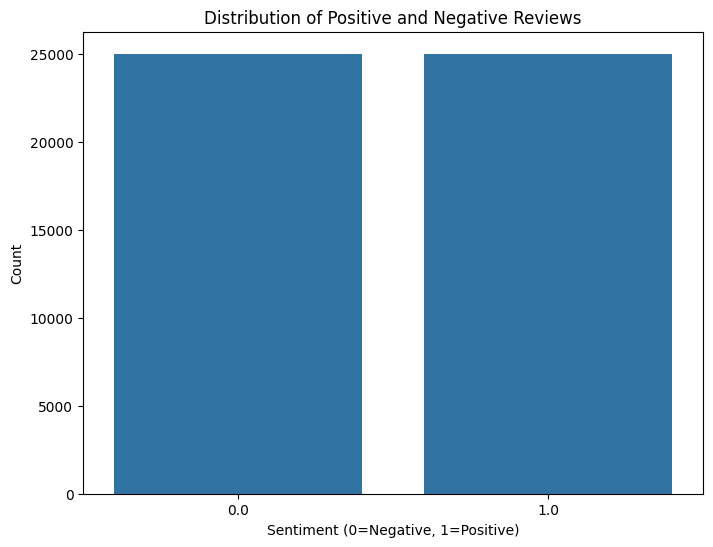

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
labelDF = pd.DataFrame({'label': label})
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=labelDF)
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vectorized, label, test_size=0.20, random_state=1)

In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (40000, 10000)
X_test shape: (10000, 10000)


In [19]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
model = models.Sequential()

model.add(layers.Dense(50, activation="relu", input_shape=(10000,)))

model.add(layers.Dropout(0.3))

model.add(layers.Dense(25, activation="relu"))

model.add(layers.Dropout(0.3))

model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       500,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 501,351 (1.91 MB)

 Trainable params: 501,351 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

In [24]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 247ms/step - accuracy: 0.7000 - loss: 0.5664 - val_accuracy: 0.8894 - val_loss: 0.2797
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9045 - loss: 0.2593 - val_accuracy: 0.8951 - val_loss: 0.2538
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9308 - loss: 0.1890 - val_accuracy: 0.8917 - val_loss: 0.2737
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9487 - loss: 0.1495 - val_accuracy: 0.8911 - val_loss: 0.2813
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9652 - loss: 0.1085 - val_accuracy: 0.8879 - val_loss: 0.3159


In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8854 - loss: 0.3282
Test accuracy: 0.890
Test loss: 0.322


In [26]:
predictions = model.predict(X_test)
predictions = [1 if x > 0.5 else 0 for x in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

In [28]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

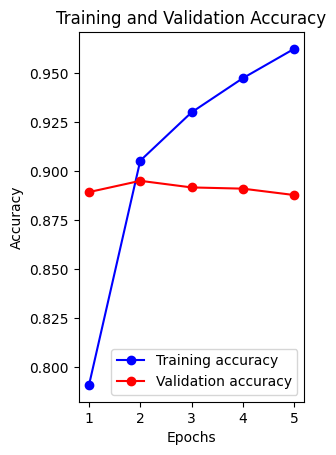

In [29]:
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

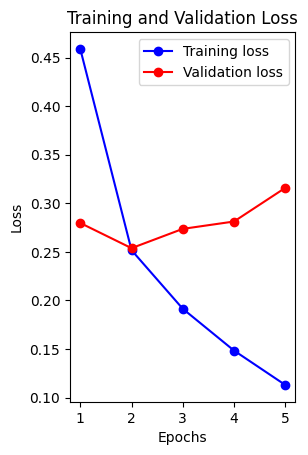

In [30]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [31]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

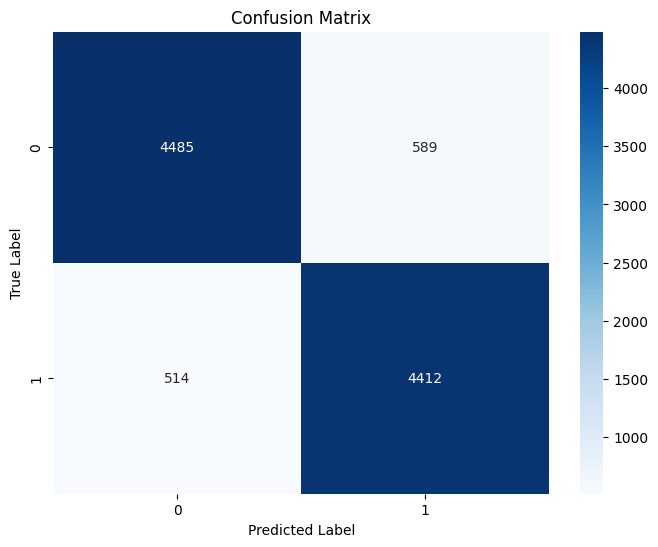

In [33]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      5074
         1.0       0.88      0.90      0.89      4926

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [35]:
def prepare_review(review, word_index, max_words=10000):
    words = review.lower().split()

    integer_sequence = []
    for word in words:
        if word in word_index and word_index[word] < max_words:
            integer_sequence.append(word_index[word] + 3)
        else:
            integer_sequence.append(2)

    vectorized = np.zeros((1, max_words))
    for i in integer_sequence:
        if i < max_words:
            vectorized[0, i] = 1

    return vectorized

In [36]:
word_index = imdb.get_word_index()

In [37]:
positive_review = "This movie was fantastic! I really enjoyed the plot and the acting was superb."
negative_review = "This was a terrible waste of time. The plot was boring and the characters were poorly developed."

In [38]:
positive_vectorized = prepare_review(positive_review, word_index)
negative_vectorized = prepare_review(negative_review, word_index)

In [39]:
positive_prediction = model.predict(positive_vectorized)[0][0]
negative_prediction = model.predict(negative_vectorized)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [40]:
print(f"Positive review prediction: {positive_prediction:.4f} ({'Positive' if positive_prediction > 0.5 else 'Negative'})")
print(f"Negative review prediction: {negative_prediction:.4f} ({'Positive' if negative_prediction > 0.5 else 'Negative'})")

Positive review prediction: 0.5711 (Positive)
Negative review prediction: 0.0030 (Negative)
